# State 4 - Group Tasks
### Develop Linear and Non-Linear (polynomial with degree n) regression models for predicting cases and deaths in US.

- Start your data from 2020.06.01 (Monday) to 2021.01.03 (Sunday) of infections in US. X-Axis - number of days, Y-Axis - number of new cases and deaths.

- Calculate and report Root Mean Square Error (RMSE) for your models (linear and non-linear). https://en.wikipedia.org/wiki/Root-mean-square_deviation. Discuss bias versus variance tradeoff. (5 points)

- Plot trend line along for the data along with the forecast of 1 week ahead (i.e. make prediction on 2021.01.04 - 2021.01.10). (5 points)

- Describe the trends as compared to other countries. (5 points)

We'll start by importing and manipulating our covid data.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# reading in our main Covid Data set.
df = pd.read_csv("/Users/egekeser/Documents/Ege/Kodlama Projeleri/CSC 405/CSC 405 Project Stage 1/ProjectDataStage1WIDEFORMAT.csv")
df.head()

,Unnamed: 0,countyFIPS,County Name,State,population,2020-01-22_Cases,2020-01-23_Cases,2020-01-24_Cases,2020-01-25_Cases,2020-01-26_Cases,...,2023-07-14_Deaths,2023-07-15_Deaths,2023-07-16_Deaths,2023-07-17_Deaths,2023-07-18_Deaths,2023-07-19_Deaths,2023-07-20_Deaths,2023-07-21_Deaths,2023-07-22_Deaths,2023-07-23_Deaths
0,0,0,Statewide Unallocated,AL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1001,Autauga County,AL,55869,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,2,1003,Baldwin County,AL,223234,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,3,1005,Barbour County,AL,24686,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,4,1007,Bibb County,AL,22394,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111


In [2]:
dfmod = df.copy(deep=True)

# Create a list for our Date range of 2020-06-01 to 2021-01-03. 
col_list = [j for j in df.columns if (
    ('2020-01-22' <= j < '2020-06-01') or ('2021-01-04' <= j)) 
    and (('Cases' in j) or ('Deaths' in j))]

# Drop all columns not in our date range list.
dfmod.drop(columns=col_list, inplace=True)

# split the cases and deaths data into two seperate dataframes
c_df = dfmod.filter(like='Cases', axis=1)
d_df = dfmod.filter(like='Deaths', axis=1)

# Sums populations column to get total population in US.
pop = dfmod.population.sum()

# Sums all cases and deaths columns
ctotal_US = c_df.sum(axis=0).to_frame().T
dtotal_US = d_df.sum(axis=0).to_frame().T

In [3]:
# Convert the DataFrame to a NumPy array
carr = ctotal_US.to_numpy()
case_arr = carr[:, 1:] - carr[:, :-1]

first_column = carr[:, 0].reshape(-1, 1)
case_arr = np.hstack((first_column, case_arr))
case_arr[0, 0] = 20743

In [4]:
# converting the numpy arrat into a dataframe and transforming it.
df_casesUS_Sum = pd.DataFrame(case_arr.T, columns=['Cases'])

# Adding a new column which shows the number of days.
# at that point in time.
df_casesUS_Sum['Num_of_Days'] = df_casesUS_Sum.index + 1

# normalizing the data
df_casesUS_Sum['Cases'] = (df_casesUS_Sum.Cases/pop)*100000
df_casesUS_Sum.head()

,Cases,Num_of_Days
0,6.319754,1
1,6.640266,2
2,6.511391,3
3,6.679264,4
4,8.800067,5


In [5]:
#repeat for deaths dataframe
darr = dtotal_US.to_numpy()

death_arr = darr[:, 1:] - darr[:, :-1]
first_column = darr[:, 0].reshape(-1, 1)
death_arr = np.hstack((first_column, death_arr))
death_arr[0, 0] = 734

df_deathsUS_Sum = pd.DataFrame(death_arr.T, columns=['Deaths'])

df_deathsUS_Sum['Num_of_Days'] = df_deathsUS_Sum.index + 1

df_deathsUS_Sum['Deaths'] = (df_deathsUS_Sum.Deaths/pop)*10000000
df_deathsUS_Sum.head()

,Deaths,Num_of_Days
0,22.362723,1
1,37.230582,2
2,30.101322,3
3,29.613851,4
4,33.361283,5


### Develop the models for our Linear and Non-Linear regressions for cases. 

In [6]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.svm import SVR

# Set our x and y values for our models.
# x is number of days.
# y is number of new cases/deaths.
x_cases = np.array(df_casesUS_Sum.Num_of_Days).reshape(-1, 1)
y_cases = np.array(df_casesUS_Sum.Cases).reshape(-1, 1)

In [7]:
# Here we set up our train and test variables based on our x and y values.
x_train,x_test,y_train,y_test=train_test_split(x_cases, y_cases, test_size=0.3, random_state=42)

In [8]:
# This is our SVR training our linear model.
svr_lin = SVR(kernel="linear")
svr_lin.fit(x_train, y_train.ravel())

# This is our SVR training our non-linear model.
# this is using a poly regresion.
svr_poly1 = SVR(kernel="poly", degree=1)
svr_poly2 = SVR(kernel="poly", degree=2)
svr_poly3 = SVR(kernel="poly", degree=3)
svr_poly4 = SVR(kernel="poly", degree=4)

# Train the non linear model.
svr_poly1.fit(x_train, y_train.ravel())
svr_poly2.fit(x_train, y_train.ravel())
svr_poly3.fit(x_train, y_train.ravel())
svr_poly4.fit(x_train, y_train.ravel())

SVR(degree=4, kernel='poly')

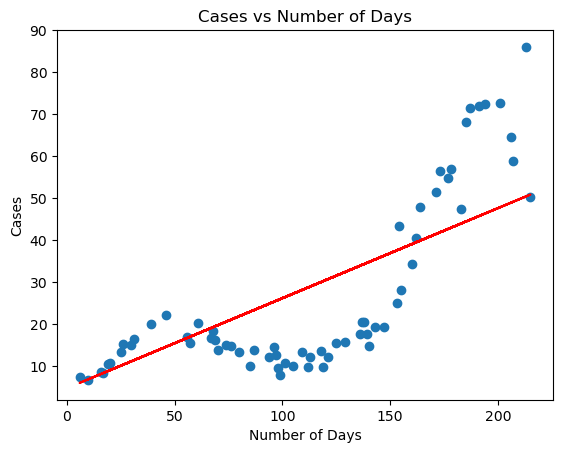

In [9]:
y_pred = svr_lin.predict(x_test)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color = 'red')
plt.title('Cases vs Number of Days')
plt.xlabel('Number of Days')
plt.ylabel('Cases')
plt.show()

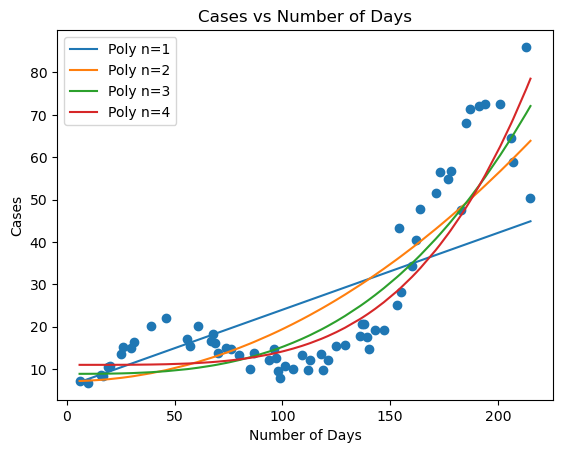

In [10]:
#make our pridict variables
y_predN1 = svr_poly1.predict(x_test)
y_predN2 = svr_poly2.predict(x_test)
y_predN3 = svr_poly3.predict(x_test)
y_predN4 = svr_poly4.predict(x_test)

# predict arrays values to dataframes.
x_testD = pd.DataFrame(x_test, columns=['x_test'])
y_predN1D = pd.DataFrame(y_predN1, columns=['y_predN1'])
y_predN2D = pd.DataFrame(y_predN2, columns=['y_predN2'])
y_predN3D = pd.DataFrame(y_predN3, columns=['y_predN3'])
y_predN4D = pd.DataFrame(y_predN4, columns=['y_predN4'])

# concat the predict arrays with x_test values.
poly1 = pd.concat([x_testD, y_predN1D], axis=1)
poly2 = pd.concat([x_testD, y_predN2D], axis=1)
poly3 = pd.concat([x_testD, y_predN3D], axis=1)
poly4 = pd.concat([x_testD, y_predN4D], axis=1)

# Sort the values by the predict values.
poly1 = poly1.sort_values(by=['y_predN1'], ascending=True)
poly2 = poly2.sort_values(by=['y_predN2'], ascending=True)
poly3 = poly3.sort_values(by=['y_predN3'], ascending=True)
poly4 = poly4.sort_values(by=['y_predN4'], ascending=True)

# plot our values.
plt.scatter(x_test, y_test)
plt.plot(poly1.x_test, poly1.y_predN1, label="Poly n=1")
plt.plot(poly2.x_test, poly2.y_predN2, label="Poly n=2")
plt.plot(poly3.x_test, poly3.y_predN3, label="Poly n=3")
plt.plot(poly4.x_test, poly4.y_predN4, label="Poly n=4")

# Add titles and labels
plt.title('Cases vs Number of Days')
plt.xlabel('Number of Days')
plt.ylabel('Cases')

plt.legend()
plt.show()

### Develop the models for our Linear and Non-Linear regressions for deaths. 

In [11]:
# Set our x and y values for our models.
# x is number of days.
# y is number of new cases/deaths.
x_deaths = np.array(df_deathsUS_Sum.Num_of_Days).reshape(-1, 1)
y_deaths = np.array(df_deathsUS_Sum.Deaths).reshape(-1, 1)

In [12]:
# Here we set up our train and test variables based on our x and y values.
xd_train,xd_test,yd_train,yd_test = train_test_split(x_deaths, y_deaths, test_size=0.3, random_state=42)

In [13]:
# This is our SVR training our linear model.
svr_lin_death = SVR(kernel="linear")
svr_lin_death.fit(xd_train, yd_train.ravel())

# This is our SVR training our non-linear model.
# this is using a poly regresion.
svr_poly1_death = SVR(kernel="poly", degree=1)
svr_poly2_death = SVR(kernel="poly", degree=2)
svr_poly3_death = SVR(kernel="poly", degree=3)
svr_poly4_death = SVR(kernel="poly", degree=4)

# Train the non linear model.
svr_poly1_death.fit(xd_train, yd_train.ravel())
svr_poly2_death.fit(xd_train, yd_train.ravel())
svr_poly3_death.fit(xd_train, yd_train.ravel())
svr_poly4_death.fit(xd_train, yd_train.ravel())

SVR(degree=4, kernel='poly')

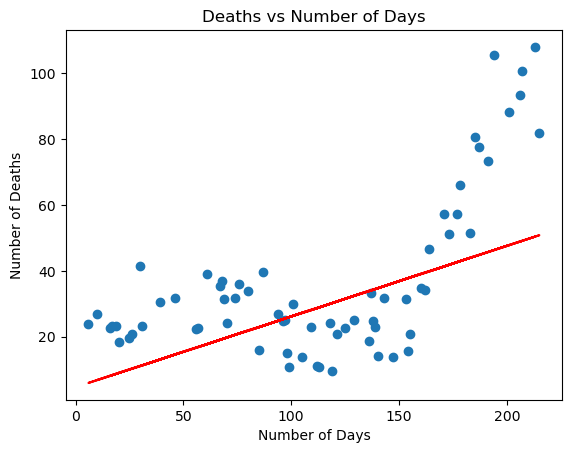

In [14]:
yd_pred = svr_lin.predict(xd_test)

plt.scatter(xd_test, yd_test)
plt.plot(xd_test, yd_pred, color = 'red')
plt.title('Deaths vs Number of Days')
plt.xlabel('Number of Days')
plt.ylabel('Number of Deaths')
plt.show()

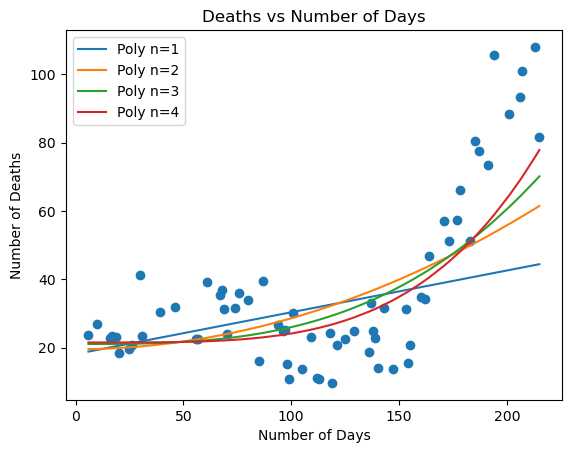

In [15]:
#make our pridict variables
yd_predN1 = svr_poly1_death.predict(x_test)
yd_predN2 = svr_poly2_death.predict(x_test)
yd_predN3 = svr_poly3_death.predict(x_test)
yd_predN4 = svr_poly4_death.predict(x_test)

# predict arrays values to dataframes.
xd_testD = pd.DataFrame(xd_test, columns=['x_test'])
yd_predN1D = pd.DataFrame(yd_predN1, columns=['y_predN1'])
yd_predN2D = pd.DataFrame(yd_predN2, columns=['y_predN2'])
yd_predN3D = pd.DataFrame(yd_predN3, columns=['y_predN3'])
yd_predN4D = pd.DataFrame(yd_predN4, columns=['y_predN4'])

# concat the predict arrays with x_test values.
poly1d = pd.concat([xd_testD, yd_predN1D], axis=1)
poly2d = pd.concat([xd_testD, yd_predN2D], axis=1)
poly3d = pd.concat([xd_testD, yd_predN3D], axis=1)
poly4d = pd.concat([xd_testD, yd_predN4D], axis=1)

# Sort the values by the predict values.
poly1d = poly1d.sort_values(by=['y_predN1'], ascending=True)
poly2d = poly2d.sort_values(by=['y_predN2'], ascending=True)
poly3d = poly3d.sort_values(by=['y_predN3'], ascending=True)
poly4d = poly4d.sort_values(by=['y_predN4'], ascending=True)

# plot our values.
plt.scatter(xd_test, yd_test)
plt.plot(poly1d.x_test, poly1d.y_predN1, label="Poly n=1")
plt.plot(poly2d.x_test, poly2d.y_predN2, label="Poly n=2")
plt.plot(poly3d.x_test, poly3d.y_predN3, label="Poly n=3")
plt.plot(poly4d.x_test, poly4d.y_predN4, label="Poly n=4")

# Add titles and labels
plt.title('Deaths vs Number of Days')
plt.xlabel('Number of Days')
plt.ylabel('Number of Deaths')

plt.legend()
plt.show()

### Calculate and report Root Mean Square Error (RMSE) for your models (linear and non-linear). 


In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Time to find our RMSE values for our models.
# Cases Linear model
print("\nLinear Cases Regression model:\n")
c_mse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True)
c_rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
print("- MSE:",c_mse)
print("- RMSE:",c_rmse)

# Cases Non Linear model
print("\nNon-Linear Cases Regression model (n=1 through n=4):\n")
print("- n=1")
cn1_mse = mean_squared_error(y_true=y_test, y_pred=y_predN1, squared=True)
cn1_rmse = mean_squared_error(y_true=y_test, y_pred=y_predN1, squared=False)
print("- MSE:",cn1_mse)
print("- RMSE:",cn1_rmse)

# for n=2
print("\n- n=2")
cn2_mse = mean_squared_error(y_true=y_test, y_pred=y_predN2, squared=True)
cn2_rmse = mean_squared_error(y_true=y_test, y_pred=y_predN2, squared=False)
print("- MSE:",cn2_mse)
print("- RMSE:",cn2_rmse)

# for n=3
print("\n- n=3")
cn3_mse = mean_squared_error(y_true=y_test, y_pred=y_predN3, squared=True)
cn3_rmse = mean_squared_error(y_true=y_test, y_pred=y_predN3, squared=False)
print("- MSE:",cn3_mse)
print("- RMSE:",cn3_rmse)

# for n=4
print("\n- n=4")
cn4_mse = mean_squared_error(y_true=y_test, y_pred=y_predN4, squared=True)
cn4_rmse = mean_squared_error(y_true=y_test, y_pred=y_predN4, squared=False)
print("- MSE:",cn4_mse)
print("- RMSE:",cn4_rmse)

# Deaths Linear model
print("\nLinear Deaths Regression model:\n")
d_mse = mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=True)
d_rmse = mean_squared_error(y_true=yd_test, y_pred=yd_pred, squared=False)
print("- MSE:",d_mse)
print("- RMSE:",d_rmse)

# Deaths Non Linear model
print("\nNon-Linear Deaths Regression model (n=1 through n=4):\n")
print("- n=1")
dn1_mse = mean_squared_error(y_true=yd_test, y_pred=yd_predN1, squared=True)
dn1_rmse = mean_squared_error(y_true=yd_test, y_pred=yd_predN1, squared=False)
print("- MSE:",dn1_mse)
print("- RMSE:",dn1_rmse)

# for n=2
print("\n- n=2")
dn2_mse = mean_squared_error(y_true=y_test, y_pred=y_predN2, squared=True)
dn2_rmse = mean_squared_error(y_true=y_test, y_pred=y_predN2, squared=False)
print("- MSE:",dn2_mse)
print("- RMSE:",dn2_rmse)

# for n=3
print("\n- n=3")
dn3_mse = mean_squared_error(y_true=yd_test, y_pred=yd_predN3, squared=True)
dn3_rmse = mean_squared_error(y_true=yd_test, y_pred=yd_predN3, squared=False)
print("- MSE:",dn3_mse)
print("- RMSE:",dn3_rmse)

# for n=4
print("\n- n=4")
dn4_mse = mean_squared_error(y_true=yd_test, y_pred=yd_predN4, squared=True)
dn4_rmse = mean_squared_error(y_true=yd_test, y_pred=yd_predN4, squared=False)
print("- MSE:",dn4_mse)
print("- RMSE:",dn4_rmse)


Linear Cases Regression model:

- MSE: 188.56195810480907
- RMSE: 13.731786413457248

Non-Linear Cases Regression model (n=1 through n=4):

- n=1
- MSE: 203.00120370999053
- RMSE: 14.247849090651913

- n=2
- MSE: 103.56879388469675
- RMSE: 10.176875448029064

- n=3
- MSE: 76.67124610674641
- RMSE: 8.756211858260762

- n=4
- MSE: 75.65043571319765
- RMSE: 8.697725893197466

Linear Deaths Regression model:

- MSE: 424.2424260686954
- RMSE: 20.5971460661106

Non-Linear Deaths Regression model (n=1 through n=4):

- n=1
- MSE: 448.2755767474887
- RMSE: 21.172519376481596

- n=2
- MSE: 103.56879388469675
- RMSE: 10.176875448029064

- n=3
- MSE: 233.3905045329158
- RMSE: 15.277123568686475

- n=4
- MSE: 193.8546457316812
- RMSE: 13.923169385297342


### Discuss bias versus variance tradeoff.

We know that linear regression provides us with a model that has a high bias and a low variance. 
    The non-linear model that we used was a polynomial regression which from looking at the plots we can see that as the degree n increase from 1 to 4 the variance increases and the bias decrease. We know that his is happening because the model starts to conform and bend more and more as the degree n increases.
    This tradeoff is important because if you don't want the model to bend and touch every point on the scatter plot, you need to balance the variance and bias until you get a good fit. One way we can tell if it is a good fir mathematically is to look at the Root Mean Square Error. By calculating this number, it acts as a performance tester to see how well the model fits to our data.
- Looking at our RMSE values we can say that degree n=4 works best for our Non-linear Cases Regression Model, and that degree n=2 works best for our Non-linear Deaths Regression Model.

### Plot trend line along for the data along with the forecast of 1 week ahead.

### Cases

In [64]:
# Needed to reshape the data in order to get a one-dimensional array.

x_cases = np.array(df_casesUS_Sum.Num_of_Days).reshape(-1)
y_cases = np.array(df_casesUS_Sum.Cases).reshape(-1) 

In [65]:
# Getting our trendline ready using polynomial regression.
# We are setting our n value equal to 4 for Cases since it was the most accurate one according to our previous calculations.

zCases = np.polyfit(x_cases, y_cases, 4)
pCases = np.poly1d(zCases)

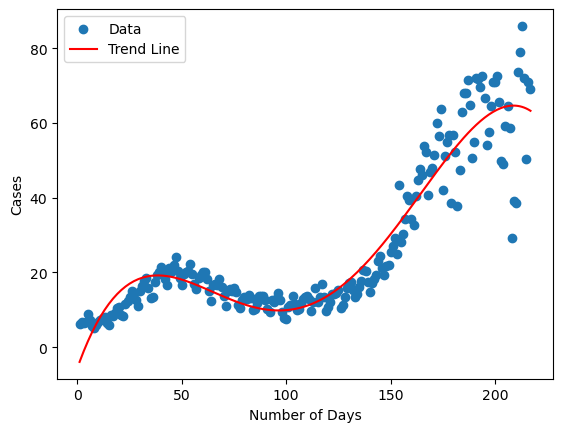

In [74]:
# Plotting our trendline and data before further forecast.

plt.scatter(x_cases, y_cases, label="Data")
plt.plot(x_cases, pCases(x_cases), label="Trend Line", color="red")
plt.xlabel('Number of Days')
plt.ylabel('Cases')
plt.legend()
plt.show()

In [81]:
# Setting up our forecasting model.
# Started by adding seven more days to our specified range of dates.
# Continued by extending our trendline for both x and y axis.

numberOfDaysForecastedCases = x_cases[-1] + 7
xForecastedCases = np.arange(x_cases[0], numberOfDaysForecastedCases)

In [82]:
yForecastedCases = pCases(xForecastedCases)

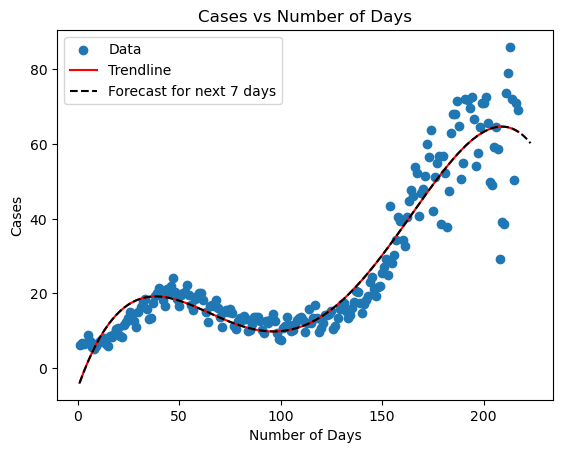

In [101]:
# Displaying our forecast, data and trendline.

plt.scatter(x_cases, y_cases, label="Data")
plt.plot(x_cases, pCases(x_cases), label="Trendline", color="red")
plt.plot(xForecastedCases, yForecastedCases, label="Forecast for next 7 days", linestyle='--', color='black')
plt.title('Cases vs Number of Days')
plt.xlabel('Number of Days')
plt.ylabel('Cases')
plt.legend()
plt.show()

### Deaths

In [93]:
# Followed exactly the same steps with the Cases but we have used n = 2 for polynomial regression.
# Needed to reshape the data in order to get a one-dimensional array.
x_deaths = np.array(df_deathsUS_Sum.Num_of_Days).reshape(-1)
y_deaths = np.array(df_deathsUS_Sum.Deaths).reshape(-1) 

In [94]:
# Getting our trendline ready using polynomial regression.

zDeaths = np.polyfit(x_deaths, y_deaths, 2)
pDeaths = np.poly1d(zDeaths)

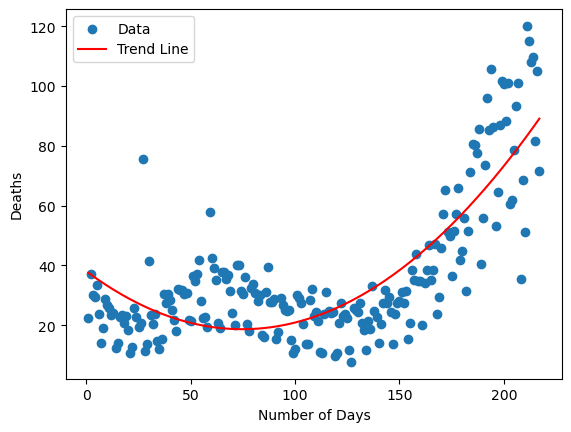

In [95]:
# Plotting our trendline and data before further forecast.

plt.scatter(x_deaths, y_deaths, label="Data")
plt.plot(x_deaths, pDeaths(x_deaths), label="Trend Line", color="red")
plt.xlabel('Number of Days')
plt.ylabel('Deaths')
plt.legend()
plt.show()

In [96]:
# Setting up our forecasting model.
# Started by adding seven more days to our specified range of dates.
# Continued by extending our trendline for both x and y axis.

numberOfDaysForecastedDeaths = x_deaths[-1] + 7
xForecastedDeaths = np.arange(x_deaths[0], numberOfDaysForecastedDeaths)

In [97]:
yForecastedDeaths = pDeaths(xForecastedDeaths)

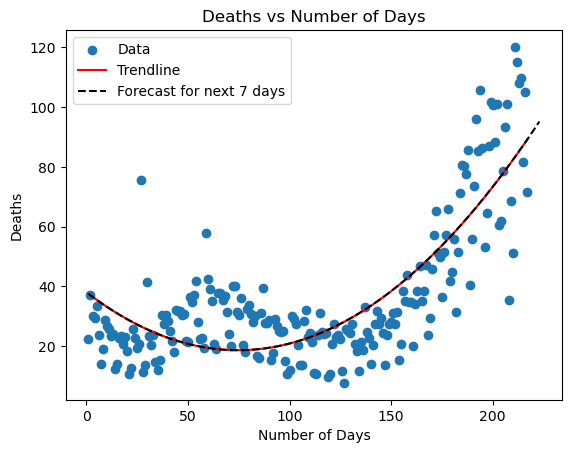

In [102]:
# Displaying our forecast, data and trendline.

plt.scatter(x_deaths, y_deaths, label="Data")
plt.plot(x_deaths, pDeaths(x_deaths), label="Trendline", color="red")
plt.plot(xForecastedDeaths, yForecastedDeaths, label="Forecast for next 7 days", linestyle='--', color='black')
plt.title('Deaths vs Number of Days')
plt.xlabel('Number of Days')
plt.ylabel('Deaths')
plt.legend()
plt.show()

### According to our calculations, the number of cases are expected to go down while the number of deaths are expected to go up within the dates of 2021.01.04 - 2021.01.10 in the United States.

# Describe the trends as compared to other countries.

From the trends data, new cases are projected to go down due to the effectiveness in the covid- safety campaigns and improved levels of awareness among the population in addition to the availability of safety kits across the US.  
The deaths are expected to go up however because, the health system is overwhelmed at this point and there are fewer professionals attending to patients. 

Comparing this data to those from around the world, this trend looks positive since there is a decline in new cases as compared to data from around the world where new cases are still on the rise due to many factors example shortage in safety kits like face masks. 